In [6]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
from instruments import *
from physical_models import *
from matplotlib.ticker import MultipleLocator
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "lines.linewidth": 3,
})

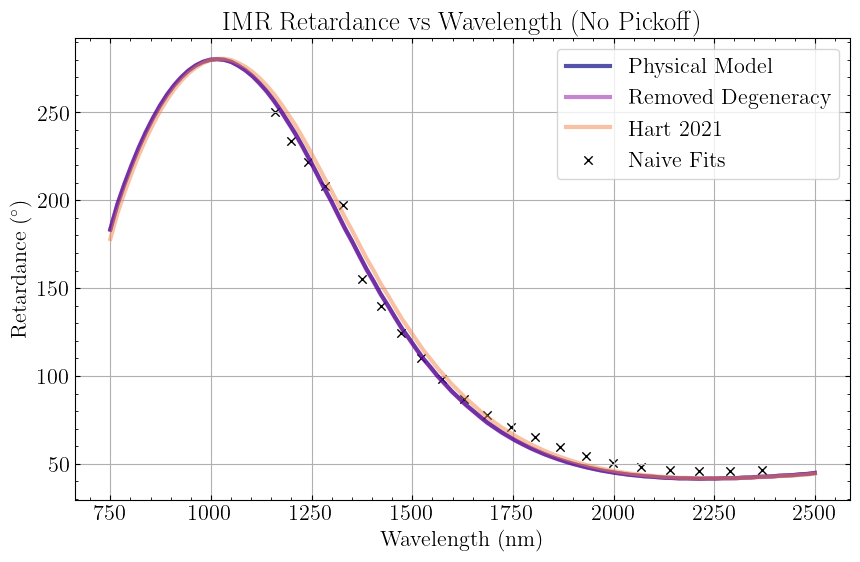

In [20]:
# Use results from minimization to make imr plot

wsio2, wmgf2, d = [1.617, 1.264, 259.7]
hart = [1.623,1.268,262.56]
nodegen = [1.622, 1.268, 259.5]
wavelengths = np.linspace(750,2500,100)
json_dir = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff_cal')
params,fig,ax = plot_config_dict_vs_wavelength('image_rotator', 'phi',json_dir, title= 'IMR Retardance vs Wavelength (No Pickoff)', axtitle='Retardance ($^{\circ}$)')
cmap = plt.get_cmap('plasma')
ax.plot(wavelengths,np.rad2deg(IMR_retardance(wavelengths,d)), color=cmap(0.0), alpha = 0.7, label = 'Physical Model')
ax.plot(wavelengths,np.rad2deg(IMR_retardance(wavelengths,nodegen[2])), color=cmap(0.3), alpha = 0.5, label = 'Removed Degeneracy')
ax.plot(wavelengths,np.rad2deg(IMR_retardance(wavelengths,hart[2])), color=cmap(0.7), alpha = 0.5, label = 'Hart 2021')
ax.scatter([], [], marker='x',color='black' ,label='Naive Fits', linewidths=1)
ax.legend()
ax.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  
)
ax.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
ax.minorticks_on()



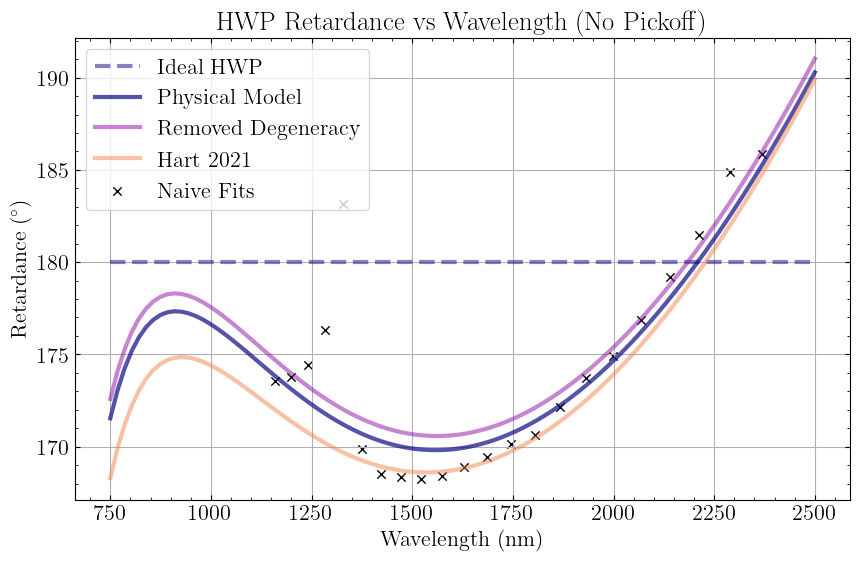

In [18]:
# now do hwp retardance

params,fig,ax = plot_config_dict_vs_wavelength('hwp', 'phi',json_dir, title= 'HWP Retardance vs Wavelength (No Pickoff)', axtitle='Retardance ($^{\circ}$)')
ax.plot(wavelengths, np.repeat(180, 100), color=cmap(1), alpha= 0.5,linestyle='--', label='Ideal HWP')
ax.plot(wavelengths, np.rad2deg(HWP_retardance(wavelengths, wsio2, wmgf2)), color=cmap(0), alpha=0.7, label='Physical Model')
ax.plot(wavelengths,np.rad2deg(HWP_retardance(wavelengths,nodegen[0],nodegen[1])), color=cmap(0.3), alpha = 0.5, label = 'Removed Degeneracy')
ax.plot(wavelengths,np.rad2deg(HWP_retardance(wavelengths,hart[0],hart[1])), color=cmap(0.7), alpha = 0.5, label = 'Hart 2021')
ax.scatter([], [], marker='x', color='black', label='Naive Fits', linewidths=1)
ax.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  # both major and minor
)
ax.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)

# Show minor ticks
ax.minorticks_on()
plt.legend()
